In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

datos = pd.read_csv('./data/StudentsPerformance.csv')
datos

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


Analizar los grupos etnicos para ver cual es el que tiene el mayor numero de reprobados con relacion al grupo etnico, y ofrecer el curso de preparacion

In [25]:
datos = datos.rename(columns={
    'race_ethnicity': 'ethnicity',
    'parental_level_of_education' : 'parental_education',
    'test_preparation_course': 'course'
})

In [26]:
df_prom = (
    datos.assign(
    mean = (datos.math_score + datos.reading_score + datos.writing_score)/3
    )
)

df_prom

,gender,ethnicity,parental_education,lunch,course,math_score,reading_score,writing_score,mean
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333


***
Separamos a los mejores con promedio mayor a 90

In [27]:
mejores = df_prom.loc[df_prom['mean']>90]
mejores

,gender,ethnicity,parental_education,lunch,course,math_score,reading_score,writing_score,mean
2,female,group B,master's degree,standard,none,90,95,93,92.666667
6,female,group B,some college,standard,completed,88,95,92,91.666667
104,male,group C,some college,standard,completed,98,86,90,91.333333
106,female,group D,master's degree,standard,none,87,100,100,95.666667
114,female,group E,bachelor's degree,standard,completed,99,100,100,99.666667
121,male,group B,associate's degree,standard,completed,91,89,92,90.666667
122,female,group C,some college,standard,completed,88,93,93,91.333333
149,male,group E,associate's degree,free/reduced,completed,100,100,93,97.666667
165,female,group C,bachelor's degree,standard,completed,96,100,100,98.666667
179,female,group D,some high school,standard,completed,97,100,100,99.000000


<Axes: xlabel='ethnicity', ylabel='count'>

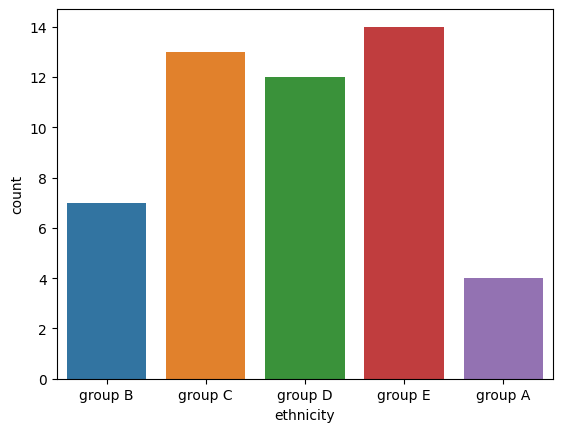

In [28]:
sns.countplot(data=mejores, x='ethnicity')

In [49]:
mejores.value_counts('ethnicity')

ethnicity
group E    14
group C    13
group D    12
group B     7
group A     4
dtype: int64

***
Los de bajo desempeño (menor a 60)

In [31]:
bajo = df_prom.loc[df_prom['mean']<60]
bajo

,gender,ethnicity,parental_education,lunch,course,math_score,reading_score,writing_score,mean
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
7,male,group B,some college,free/reduced,none,40,43,39,40.666667
9,female,group B,high school,free/reduced,none,38,60,50,49.333333
10,male,group C,associate's degree,standard,none,58,54,52,54.666667
11,male,group D,associate's degree,standard,none,40,52,43,45.000000
...,...,...,...,...,...,...,...,...,...
980,female,group B,high school,free/reduced,none,8,24,23,18.333333
985,male,group A,high school,standard,none,57,51,54,54.000000
986,female,group C,associate's degree,standard,none,40,59,51,50.000000
988,female,group A,some high school,free/reduced,none,44,45,45,44.666667


<Axes: xlabel='ethnicity', ylabel='count'>

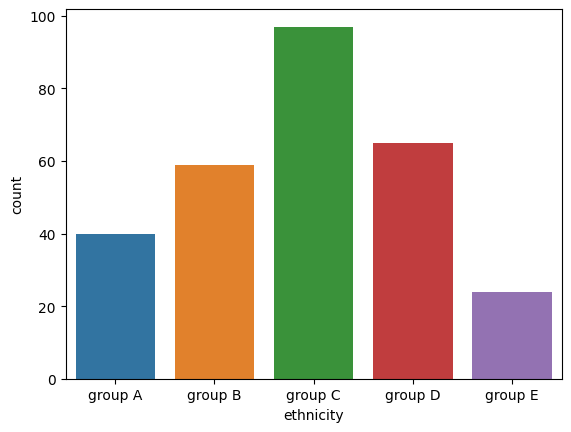

In [33]:
sns.countplot(data=bajo,x='ethnicity')

In [48]:
bajo.value_counts('ethnicity')

ethnicity
group C    97
group D    65
group B    59
group A    40
group E    24
dtype: int64

Son 285 alumnos reprobados, pero el grupo c muestra la mayor concentracion con un total de 97 aqui es donde engtra nuestro estudio, depende mucho del examen de escritura

In [50]:
bajo.corr()

C:\Users\dern9\AppData\Local\Temp\ipykernel_25992\4273602314.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  bajo.corr()


,math_score,reading_score,writing_score,mean
math_score,1.000000,0.502941,0.516400,0.799107
reading_score,0.502941,1.000000,0.877924,0.898760
writing_score,0.516400,0.877924,1.000000,0.906697
mean,0.799107,0.898760,0.906697,1.000000
